# Building a Simple LIF Model with NEURON

A great exercise for anyone looking to get familiar with building neuron models using NEURON. Try reproducing on your own!

In [84]:
%pip install neuron --quiet
from neuron import h
from neuron.units import mV, ms

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [99]:
# Creating a singular, soma region for our cell model
# and insert leaky channel

soma = h.Section(name="soma")
soma.insert("pas")

print(soma.psection())

{'point_processes': {}, 'density_mechs': {'pas': {'g': [0.001], 'e': [-70.0], 'i': [0.0]}}, 'ions': {}, 'morphology': {'L': 100.0, 'diam': [500.0], 'pts3d': [], 'parent': None, 'trueparent': None}, 'nseg': 1, 'Ra': 35.4, 'cm': [1.0], 'regions': set(), 'species': set(), 'name': 'soma', 'hoc_internal_name': '__nrnsec_0x1201a0c60', 'cell': None}


In [100]:
# Insert clamp at end of soma and set stimulation parameters
iclamp = h.IClamp(soma(0.1))
iclamp.delay = 2 * ms
iclamp.dur = 10 * ms
iclamp.amp = 10 * mV

soma_v = h.Vector().record(soma(0.1)._ref_v)
soma_t = h.Vector().record(h._ref_t)


In [101]:
# Run simulation 
h.load_file("stdrun.hoc")
h.finitialize(-70 * mV)
h.continuerun(50 * ms)

0.0

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


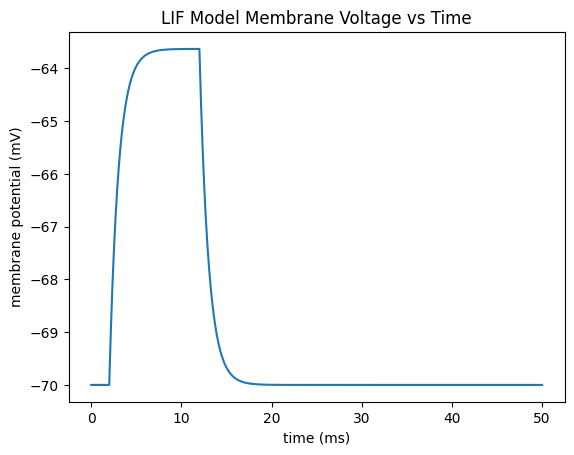

In [102]:
%pip install matplotlib --quiet
import matplotlib.pyplot as plt

plt.plot(soma_t, soma_v)
plt.xlabel("time (ms)")
plt.ylabel("membrane potential (mV)")
plt.title("LIF Model Membrane Voltage vs Time")
plt.show()

# Comparison with HH Model

Hodgkin-Huxley models allow us to better account for particle kinetics and biophysical behaviour of a neuron during an action potential. Let's see if we can plot a comparison of our LIF model against a new, HH model

In [135]:
hh_soma = h.Section(name="soma")
hh_soma.insert("hh")

# Printing properties of hh_soma reveals insight about particle kinetic values
print(hh_soma.psection())

{'point_processes': {}, 'density_mechs': {'hh': {'gnabar': [0.12], 'gkbar': [0.036], 'gl': [0.0003], 'el': [-54.3], 'gna': [0.0], 'gk': [0.0], 'il': [0.0], 'minf': [0.0], 'hinf': [0.0], 'ninf': [0.0], 'mtau': [0.0], 'htau': [0.0], 'ntau': [0.0], 'm': [0.0], 'h': [0.0], 'n': [0.0]}}, 'ions': {'na': {'ena': [50.0], 'nai': [10.0], 'nao': [140.0], 'ina': [0.0], 'dina_dv_': [0.0]}, 'k': {'ek': [-77.0], 'ki': [54.4], 'ko': [2.5], 'ik': [0.0], 'dik_dv_': [0.0]}}, 'morphology': {'L': 100.0, 'diam': [500.0], 'pts3d': [], 'parent': None, 'trueparent': None}, 'nseg': 1, 'Ra': 35.4, 'cm': [1.0], 'regions': set(), 'species': set(), 'name': 'soma', 'hoc_internal_name': '__nrnsec_0x1201a0d80', 'cell': None}


In [136]:
# Insert clamp at end of soma and set stimulation parameters
hh_clamp = h.IClamp(hh_soma(0.1))
hh_clamp.delay = 2 * ms
hh_clamp.dur = 15 * ms
hh_clamp.amp = 100 * mV

# Do the same for LIF model
lif_clamp = h.IClamp(soma(0.1))
lif_clamp.delay = 2 * ms
lif_clamp.dur = 15 * ms
lif_clamp.amp = 100 * mV

hh_soma_v = h.Vector().record(hh_soma(0.1)._ref_v)
hh_soma_t = h.Vector().record(h._ref_t)

soma_v = h.Vector().record(soma(0.1)._ref_v)
soma_t = h.Vector().record(h._ref_t)

In [137]:
h.finitialize(-70 * mV)
h.continuerun(50 * ms)

0.0

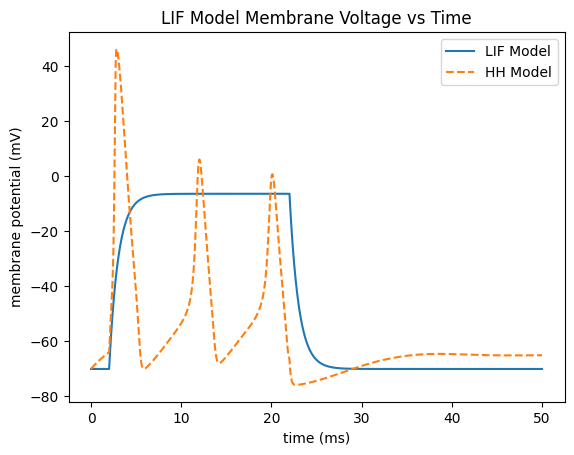

In [138]:
plt.plot(soma_t, soma_v, label="LIF Model")
plt.plot(hh_soma_t, hh_soma_v, label="HH Model", linestyle="--")
plt.xlabel("time (ms)")
plt.ylabel("membrane potential (mV)")
plt.title("LIF Model Membrane Voltage vs Time")
plt.legend()
plt.show()